# MPA-MLF, Lab 2 - Clustering and K-means

# Exercise 1 - K-means from scratch

Implementing K-means
In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

Steps:
Specify the number of clusters K
initialize centroids
calculate the distance from centroids to all points in datasets
assign data points to the closest centroids
calculate objective function
compute new centroids to the clusters by taking the average of all data points that belong to each cluster
repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached
Tips:

Avoid using loops; if it is unnecessary, instead of using loops, use NumPy functions. There is a list of NumPy functions that you might find helpful:

np.argmin()

np.where()

np.transpose()

np.random.permutation()

np.random.schuffle()

np.linalg.norm()

np.arange()

np.split()

np.random.choice()
Since the initial clusters are selected randomly, the algorithm can lead to different results each time it runs. Running the algorithm multiple times and determining the result with the lowest objective function helps obtain the best results.

In [6]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

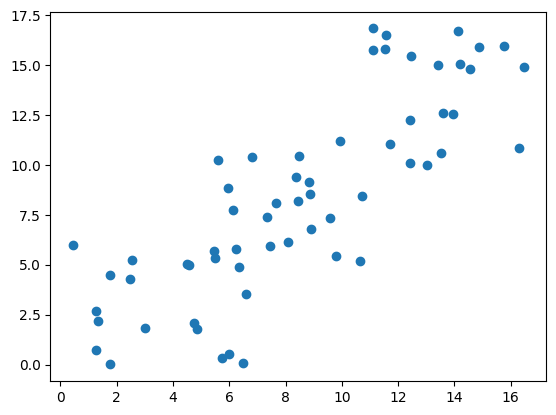

In [7]:
loaded_points = np.load('k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])


# 1. Specify number of clusters K

In [8]:
k = 3

# 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first k_clusters points as initial centroids

In [9]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #

    # Select 'k_clusters' random indices from the dataset without replacement
    indexes = np.random.choice(points.shape[0], k_clusters, replace=False)

    # Initialize the centroids using the randomly selected data points
    initial_clusters = points[indexes]

    ###################################

    return initial_clusters

# 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [10]:

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #

    # Compute the Euclidean distance from each point to the given centroid
    distances_array = np.linalg.norm(points - centroid, axis=1)

    ###################################

    return distances_array

Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [11]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #

    # Get the number of clusters (k) from the shape of centroid points
    k_clusters = centroids_points.shape[0]

    # Get the number of data points
    n_points = points.shape[0]

    # Initialize an array to store distances from each point to each centroid
    distances_array = np.zeros((k_clusters, n_points))

    # Compute the Euclidean distance from each point to every centroid
    for i in range(k_clusters):
        distances_array[i] = np.linalg.norm(points - centroids_points[i], axis=1)

    ###################################

    return distances_array


# 4. Assign datapoints to the closest centroids

In [12]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    # Assign each point to the nearest centroid by finding the index of the minimum distance
    assigned_centroids = np.argmin(distances, axis=0)

    ###################################

    return assigned_centroids


# 5. Calculate objective function

In [13]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #

    # Calculate the objective function value by summing the distances of each point to its assigned centroid
    objective_function_value = np.sum(distances[assigned_centroids, np.arange(distances.shape[1])])

    ###################################

    return objective_function_value


# 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [14]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    # Initialize an array to store the new centroids
    new_clusters = np.zeros((k_clusters, points.shape[1]), dtype=np.float32)

    # Update each centroid by computing the mean of the assigned points
    for k in range(k_clusters):
       # Get all points assigned to the current cluster
        cluster_points = points[assigned_centroids == k]

        # If the cluster has points, update its centroid with the mean position
        if len(cluster_points) > 0:
            new_clusters[k] = np.mean(cluster_points, axis=0)

    ###################################

    return new_clusters


# 7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [15]:
def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

     # Step 1: Initialize centroids
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = float('inf')

    for _ in range(n_of_iterations):
        # Step 2: Calculate distances from points to centroids
        distances = np.array([calculate_metric(points, centroid) for centroid in centroid_points])

        # Step 3: Assign each point to the closest centroid
        assigned_centroids = assign_centroids(distances)

        # Step 4: Calculate the objective function value
        current_objective = calculate_objective(assigned_centroids, distances)

        # Step 5: Check for convergence
        if abs(last_objective - current_objective) < error:
            break

        last_objective = current_objective

        # Step 6: Calculate new centroids
        centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)

    ###################################

    return centroid_points, last_objective

# Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple,

1. Create a vector of possible k values.

2. Fit your data using different k values and save the objective function value

3. Plot objective function values in terms of k values

4. Find an elbow

In [16]:
# Define the range of k values
k_all = range(2, 10)
all_objective = []

# Iterate over each k value
for k in k_all:
    # Fit the k-means model
    centroids, objective = fit(loaded_points, k, n_of_iterations=100)
    # Save the objective function value
    all_objective.append(objective)

Text(0, 0.5, 'Sum of squared distance')

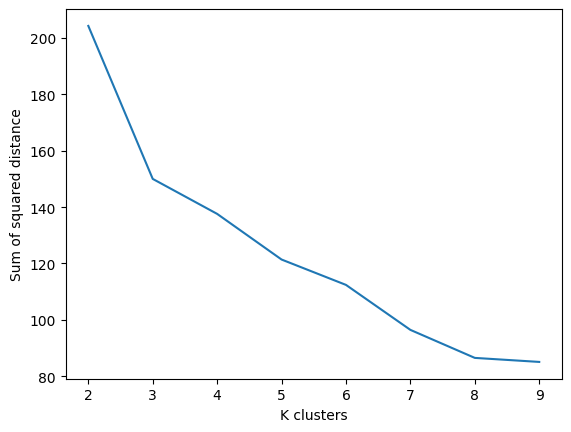

In [18]:

plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression


In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory Data\. This time, we will use a library that implements k-means for us - sklearn https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use openCv or matplotlib (or anything else)

### Steps

1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
2. Initialize the K_means algorithm, where K would be equal to the number of colours in the compressed image
3. Check cluster centroids and convert them to integers - these are your new colours (kmeans.cluster_centers_ could be useful)
4. Replace your 2D array colors with newly generated colors
5. Reshape your 2D array to the original image shape.




Tips:

*   It takes a couple of seconds to compress the attached image.
*   For debugging purposes, you can use a custom smaller image
the implementation can be done in a single function

In [19]:

from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

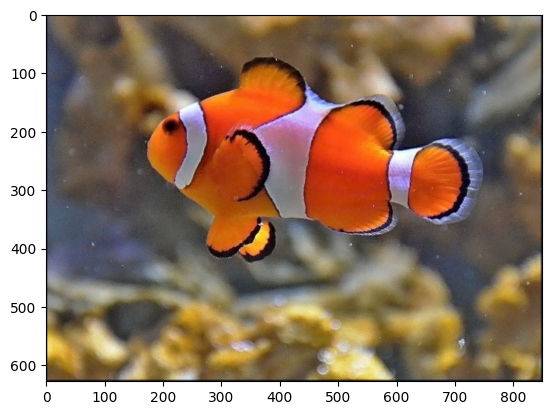

In [20]:

loaded_image = imread('fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [22]:
def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """

    # Step 1: Reshape image into 2D array (pixels, color_channels)
    h, w, c = image.shape
    pixels = image.reshape((-1, c))

    # Step 2: Apply k-means clustering
    centroid_points, _ = fit(pixels.astype(np.float32), number_of_colours, 100)

    # Step 3: Assign each pixel to the closest centroid
    distances = np.array([np.linalg.norm(pixels - centroid, axis=1) for centroid in centroid_points])
    assigned_clusters = np.argmin(distances, axis=0)

    # Step 4: Replace pixel values with corresponding cluster centroids
    new_pixels = centroid_points[assigned_clusters].astype(np.uint8)

    # Step 5: Reshape back to original image shape
    compressed_image = new_pixels.reshape((h, w, c))

    return compressed_image




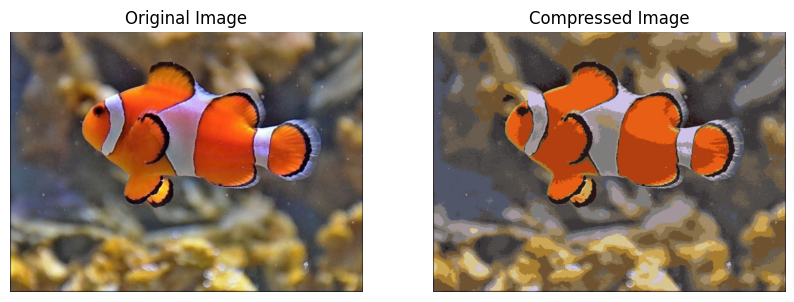

In [24]:
# Load and compress the image
loaded_image = imread('fish.jpg')
compressed = compress_image(loaded_image, number_of_colours=16)

# Display the original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(loaded_image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(compressed)
ax[1].set_title('Compressed Image')
ax[1].axis('off')
plt.show()